In [27]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv


load_dotenv(dotenv_path='../.env')

model = ChatGroq(model="llama-3.3-70b-versatile")

In [46]:
class BlogState(TypedDict):
    title : str
    outline : str
    content : str
    score : int

In [54]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

In [55]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f'Generate a detailed blog on the title - {title} using the follwing outline \n {outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state
    

In [56]:
def evaluate_blog(state: BlogState) -> BlogState:
    outline = state['outline']
    content = state['content']
    
    prompt = f'Based on this outline - \n Outline - {outline} \n Give me  ONLY an evaluation score  between 1 and 100(inclusive) -\n {content}'
    score = model.invoke(prompt).content
    state['score'] = score
    return state

In [57]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()

In [51]:
initial_state = {
    'title' : 'Rise of AI in india'
} 

final_state = workflow.invoke(initial_state)
final_state

{'title': 'Rise of AI in india',
 'outline': 'Here is a detailed outline for a blog on the topic "Rise of AI in India":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its growing importance globally\n* Importance of AI in the Indian context: economic growth, job creation, and societal benefits\n* Thesis statement: India is witnessing a significant rise in AI adoption, driven by government initiatives, startup innovation, and industry applications, transforming the country\'s economy and society.\n\n**II. Government Initiatives and Policies**\n\n* Overview of the Indian government\'s AI strategy: National Strategy for Artificial Intelligence (NSAI)\n* Key initiatives:\n\t+ Establishment of the National Artificial Intelligence Mission (NAIM)\n\t+ Creation of the AI Task Force\n\t+ Launch of the AI for All initiative\n\t+ Introduction of AI-related courses in educational institutions\n* Discussion on the impact of these initiatives on promoting AI adoption 

In [52]:
final_state['outline']

'Here is a detailed outline for a blog on the topic "Rise of AI in India":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its growing importance globally\n* Importance of AI in the Indian context: economic growth, job creation, and societal benefits\n* Thesis statement: India is witnessing a significant rise in AI adoption, driven by government initiatives, startup innovation, and industry applications, transforming the country\'s economy and society.\n\n**II. Government Initiatives and Policies**\n\n* Overview of the Indian government\'s AI strategy: National Strategy for Artificial Intelligence (NSAI)\n* Key initiatives:\n\t+ Establishment of the National Artificial Intelligence Mission (NAIM)\n\t+ Creation of the AI Task Force\n\t+ Launch of the AI for All initiative\n\t+ Introduction of AI-related courses in educational institutions\n* Discussion on the impact of these initiatives on promoting AI adoption in India\n\n**III. Startup Ecosystem and Inno

In [53]:
final_state['content']

"**The Rise of AI in India: Transforming the Economy and Society**\n\n**Introduction**\n\nArtificial Intelligence (AI) has emerged as a transformative technology, revolutionizing the way we live, work, and interact with each other. With its ability to analyze vast amounts of data, learn from experiences, and make informed decisions, AI has become an essential tool for businesses, governments, and individuals alike. As the world's second-most populous country, India is witnessing a significant rise in AI adoption, driven by government initiatives, startup innovation, and industry applications. This blog will explore the growth of AI in India, its impact on the economy and society, and the opportunities and challenges that lie ahead.\n\n**Government Initiatives and Policies**\n\nThe Indian government has recognized the potential of AI to drive economic growth, create jobs, and improve societal benefits. To harness this potential, the government has launched several initiatives and polici

In [58]:
final_state['score']

'87'

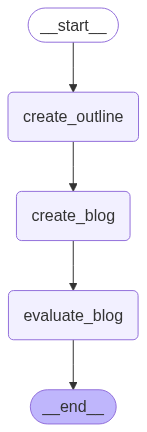

In [59]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())